In [1]:
import pyNN.spiNNaker as sim
import pyNN.utility.plotting as plot
import matplotlib.pyplot as plt


Detected PyNN version 0.9.4 and Neo version 0.6.1


## Setting up the simulator:

In [2]:
sim.setup(timestep=1.0)
sim.set_number_of_neurons_per_core(sim.IF_curr_exp, 100)

2019-05-17 14:43:07 INFO: Read cfg files: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg, /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg, /home/jovyan/.spynnaker.cfg
2019-05-17 14:43:07 INFO: Will search these locations for binaries: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/common_model_binaries : /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/model_binaries
2019-05-17 14:43:07 INFO: Setting time scale factor to 1.0.
2019-05-17 14:43:07 INFO: Setting machine time step to 1000 micro-seconds.


['/home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg', '/home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg', '/home/jovyan/.spynnaker.cfg']


## Setting up the populations:

In [3]:
# Define Input neuron
# input = sim.Population(1,sim.SpikeSourceArray(spike_times=[10, 200,210,215, 217, 220, 225, 325, 456]),label="input")
#input = sim.Population(1,sim.SpikeSourceArray(spike_times=[2]),label="input")
#input = sim.Population(1, sim.SpikeSourcePoisson(rate=0), label="Input")
input = sim.Population(1, sim.SpikeSourcePoisson(), label="Input")

# Define output neuron
pop_1 = sim.Population(1,sim.IF_curr_exp(),label="pop_1")

# Connect Input Neuron with Output neuron
input_proj=sim.Projection(input,pop_1,sim.OneToOneConnector(),synapse_type=sim.StaticSynapse(weight=5,delay=1))

pop_1.record(["spikes","v"])
input.record(["spikes"])

## Simulate:

In [4]:
simtime = 100000
sim.run(simtime)

2019-05-17 14:43:07 INFO: Simulating for 100 1000ms timesteps using a hardware timestep of 1000000us
2019-05-17 14:43:07 INFO: Starting execution process
2019-05-17 14:43:12 INFO: Time 0:00:03.881464 taken by SpallocMaxMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2019-05-17 14:43:22 INFO: Time 0:00:10.246111 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2019-05-17 14:43:30 INFO: Time 0:00:07.432388 taken by PartitionAndPlacePartitioner
Created spalloc job 4642694
2019-05-17 14:43:30 INFO: Created spalloc job 4642694
Waiting for board power commands to complete.
2019-05-17 14:43:30 INFO: Waiting for board power commands to complete.
2019-05-17 14:43:35 INFO: Time 0:00:05.056110 taken by SpallocAllocator
2019-05-

Loading Tags
|0%                          50%                         100%|
2019-05-17 14:43:46 INFO: Time 0:00:00.022310 taken by TagsLoader
Writing data
|0%                          50%                         100%|
2019-05-17 14:43:46 INFO: Time 0:00:00.031370 taken by WriteMemoryIOData
Executing data specifications and loading data
|0%                          50%                         100%|
2019-05-17 14:43:47 INFO: Time 0:00:00.152408 taken by HostExecuteDataSpecification
Expanding Synapses
|0%                          50%                         100%|
2019-05-17 14:43:47 INFO: Time 0:00:00.542337 taken by SynapseExpander
Writing fixed route report
|0%                          50%                         100%|
2019-05-17 14:43:47 INFO: Time 0:00:00.050816 taken by FixedRouteFromMachineReport
Loading executables onto the machine
|0%                          50%                         100%|
2019-05-17 14:43:49 INFO: Time 0:00:01.438459 taken by LoadExecutableImages
Reading Routi

100000.0

## Print:

In [5]:
# Input neuron
neo_input=input.get_data(variables=["spikes"])

spikes_input=neo_input.segments[0].spiketrains
print(spikes_input)
print( len(spikes_input[0]) )

# Pop1 neuron
neo_pop1=pop_1.get_data(variables=["spikes","v"])

v_pop1=neo_pop1.segments[0].filter(name='v')[0]
#print(v_pop1)

spikes_pop1=neo_pop1.segments[0].spiketrains
#print(spikes_pop1)

sim.end()

Getting spikes for Input
|0%                          50%                         100%|
Getting spikes for pop_1
|0%                          50%                         100%|
Getting v for pop_1
|0%                          50%                         100%|


[<SpikeTrain(array([  218.,   753.,  1051.,  3735.,  4496.,  6356.,  6395.,  9442.,
        9764., 10603., 11715., 12300., 12679., 14180., 14361., 15637.,
       15795., 16714., 18540., 19461., 20427., 20704., 22228., 24063.,
       24377., 26825., 28851., 29034., 30171., 31565., 32305., 32325.,
       35932., 37120., 37348., 38899., 39676., 39723., 40929., 41538.,
       42268., 43980., 45048., 46278., 46949., 47454., 48689., 49923.,
       49944., 50267., 50536., 51054., 51136., 51259., 51606., 52685.,
       53267., 53277., 55255., 55518., 58667., 59418., 59943., 60784.,
       61939., 62155., 62560., 62969., 64213., 65011., 68817., 69107.,
       70679., 72264., 73544., 74771., 75045., 75464., 75723., 78432.,
       80144., 80792., 80800., 81182., 83383., 83964., 85179., 85747.,
       86657., 86708., 86943., 87885., 89193., 89314., 90058., 91210.,
       92108., 95337., 95396., 96962., 97924., 98747., 99451.]) * ms, [0.0 ms, 100000.0 ms])>]
103


## Plot:

<IPython.core.display.Javascript object>


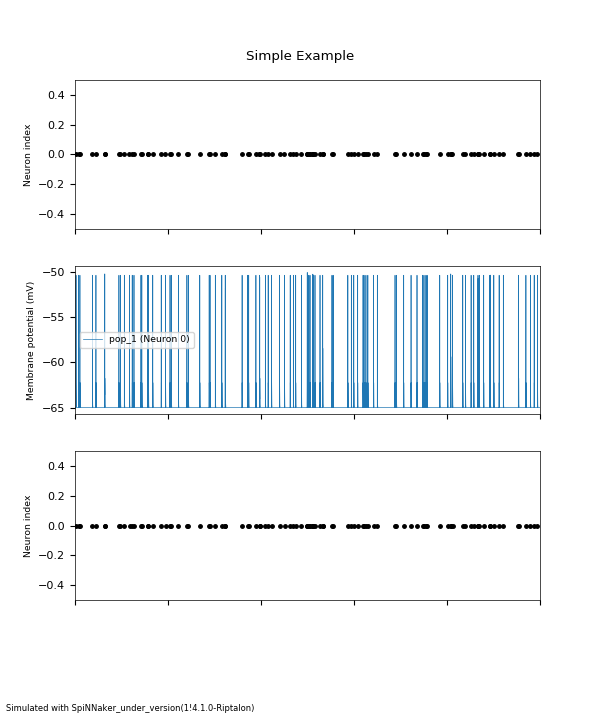

In [6]:
plot.Figure(
    #plot spikes for input population
    plot.Panel(spikes_input, yticks=True, markersize=5, xlim =(0, simtime)),
    
    #plot voltage for first ([0]) neuron
    plot.Panel(v_pop1, ylabel="Membrane potential (mV)", data_labels=[pop_1.label], yticks=True, xlim =(0, simtime)),
    
    #plot spikes for pop1 population
    plot.Panel(spikes_pop1, yticks=True, markersize=5, xlim =(0, simtime)),
    
    title="Simple Example",
    annotations="Simulated with {}".format(sim.name())
)
plt.show()